In [1]:
import numpy as np
from pyquantrf import QuantileRandomForestRegressor
from sklearn.datasets import fetch_california_housing

qrf = QuantileRandomForestRegressor(nthreads = 4,
                                    n_estimators=1000,
                                    min_samples_leaf = 10,)

qntl = np.array([0.025, 0.5, 0.975])

data = fetch_california_housing()
dataIDX = np.arange(data.target.size)[:500]
nfolds  = 5
folds   = np.array_split(dataIDX, 5)
pred    = np.zeros([data.target.size, qntl.size]) * np.nan

for f in range(nfolds):
    out_fold = folds[f]
    in_folds = np.concatenate([folds[fold] for fold in range(nfolds) if fold != f])
    qrf.fit(data.data[in_folds], data.target[in_folds])
    pred[out_fold] = qrf.predict(data.data[out_fold], qntl)

Text(0, 0.5, 'observed values and prediction intervals (centered)')

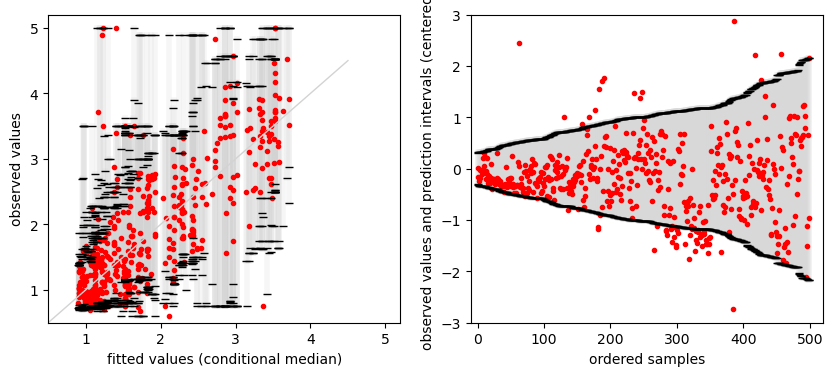

In [2]:
from matplotlib import pyplot as pl

fig, axs = pl.subplots(nrows=1, ncols=2, figsize=(10, 4))

for p in pred:
    axs[0].plot([p[1], p[1]], [p[0], p[2]], lw=4, alpha=0.2, color='LightGrey')

axs[0].plot(pred[:, 1], data.target, marker='.', color='r', lw=0)
axs[0].plot(pred[:, 1], pred[:, 0], marker='_', color='k', lw=0)
axs[0].plot(pred[:, 1], pred[:, 2], marker='_', color='k', lw=0)

axs[0].set_xlim(0.5, 5.2)
axs[0].set_ylim(0.5, 5.2)
axs[0].set_xlabel('fitted values (conditional median)')
axs[0].set_ylabel('observed values')

xlin = np.arange(0.5, 5.2)
axs[0].plot(xlin, xlin, lw=1, color='LightGrey')

interval = pred[:, 2]-pred[:, 0]
sortIDX = np.argsort(interval)
xlin    = np.arange(data.target.size)


pred_centered = (pred.T-pred[:, [0,2]].mean(axis=1)).T

for i, id in enumerate(sortIDX):
    axs[1].plot([xlin[i], xlin[i]], [pred_centered[id, 0], pred_centered[id, 2]], lw=4, alpha=0.2, color='LightGrey')

axs[1].plot(xlin, (data.target-pred[:, [0,2]].mean(axis=1))[sortIDX], marker='.', color='r', lw=0)
#axs[1].plot(xlin, pred_centered[sortIDX][:, 1], marker='.', color='r', lw=0)
axs[1].plot(xlin, pred_centered[sortIDX][:, 0], marker='_', color='k', lw=0)
axs[1].plot(xlin, pred_centered[sortIDX][:, 2], marker='_', color='k', lw=0)

axs[1].set_xlim(-10, 520)
axs[1].set_ylim(-3, 3)
axs[1].set_xlabel('ordered samples')
axs[1].set_ylabel('observed values and prediction intervals (centered)')

In [3]:
from pyquantrf import QuantileRandomForestRegressor
from sklearn.datasets import load_linnerud
import numpy as np

qrf = QuantileRandomForestRegressor(nthreads = 4,
                                    n_estimators=1000,
                                    min_samples_leaf = 10,)

n_draws = 100
qntl    = np.array([0.025, 0.5, 0.975])

data = load_linnerud()
dataIDX = np.arange(data.target.shape[0])
nfolds  = 5
folds   = np.array_split(dataIDX, 5)
pred_sample = np.zeros([*data.target.shape, n_draws]) * np.nan


for f in range(nfolds):
    out_fold = folds[f]
    in_folds = np.concatenate([folds[fold] for fold in range(nfolds) if fold != f])

    qrf.fit(data.data[in_folds], data.target[in_folds])
    pred_sample[out_fold] = qrf.predict_sample(data.data[out_fold], n_draws)